In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
dhruvildave_google_trends_dataset_path = kagglehub.dataset_download('dhruvildave/google-trends-dataset')

print('Data source import complete.')


100%|██████████| 335k/335k [00:00<00:00, 37.3MB/s]

Extracting files...
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/trends.csv", encoding='latin1')

In [ ]:
df

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
26950,Vietnam,2020,Là Gì?,1,Virus Corona là gì
26951,Vietnam,2020,Là Gì?,2,Miễn thị thực là gì
26952,Vietnam,2020,Là Gì?,3,Đầu cắt moi là gì
26953,Vietnam,2020,Là Gì?,4,Bệnh bạch hầu là gì


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


In [ ]:
df.isna().sum()

,0
location,0
year,0
category,0
rank,0
query,0


In [ ]:
df.duplicated().sum()

287

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.location.unique()

array(['Global', 'France', 'Germany', 'United Kingdom', 'Australia',
       'Canada', 'Italy', 'Netherlands', 'Spain', 'United States',
       'Argentina', 'Austria', 'Belgium', 'Brazil', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Finland', 'Hong Kong', 'India',
       'Malaysia', 'Mexico', 'New Zealand', 'Philippines', 'Poland',
       'Russia', 'Singapore', 'South Africa', 'South Korea', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'United Arab Emirates',
       'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Honduras', 'Japan', 'Kenya',
       'Nigeria', 'Panama', 'Peru', 'Egypt', 'Hungary', 'Ireland',
       'Israel', 'Norway', 'Portugal', 'Romania', 'Saudi Arabia',
       'Serbia', 'Slovakia', 'Turkey', 'Ukraine', 'Ghana', 'Indonesia',
       'Senegal', 'Uganda', 'Vietnam', 'Bangladesh', 'Bulgaria',
       'Estonia', 'Latvia', 'Lithuania', 'Pakistan', 'Puerto Rico',
       'Slovenia', 'Uruguay', 'Venezuela', '

In [ ]:
df.year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
df.category.nunique()

2154

In [ ]:
df.groupby("year")["category"].count().sort_values(ascending=False).reset_index()

,year,category
0,2016,3018
1,2020,2963
2,2015,2768
3,2013,2730
4,2019,2595
5,2017,2585
6,2018,2536
7,2014,2318
8,2012,2224
9,2008,891


In [ ]:
df.groupby('year')['query'].count().sort_values(ascending=False).reset_index()

,year,query
0,2016,3018
1,2020,2963
2,2015,2768
3,2013,2730
4,2019,2595
5,2017,2585
6,2018,2536
7,2014,2318
8,2012,2224
9,2008,891


In [ ]:
df[df.year==2005][["query"]]

,query
470,iPod
471,Digital Camera
472,MP3 Player
473,iPod Mini
474,PlayStation Portable
475,Janet Jackson
476,Hurricane Katrina
477,Tsunami
478,Xbox 360
479,Brad Pitt


In [ ]:
df[df.year==2005]["category"].unique()

array(['Froogle Searches', 'Most Searched'], dtype=object)

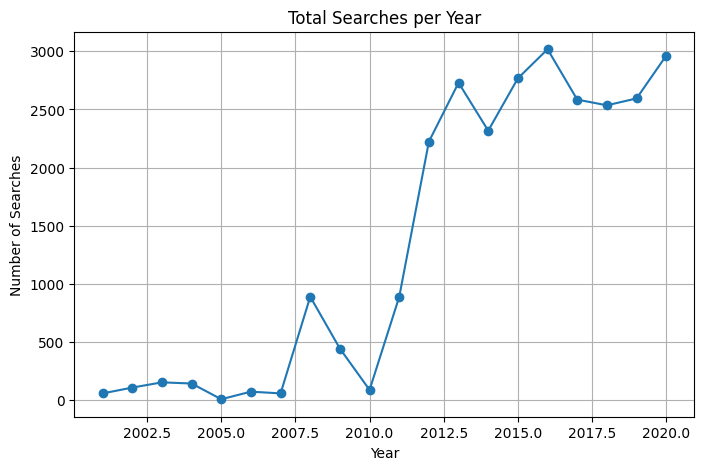

In [ ]:
yearly_search_counts = df.groupby(['year'])['query'].count()

plt.figure(figsize=(8, 5))
yearly_search_counts.plot(kind='line', marker='o')
plt.title('Total Searches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.grid()
plt.show()

In [ ]:
top_brands = df[df['category'] == 'Consumer Brands'].groupby('year')['query'].apply(lambda x: x.head(5))
print("\nTop 5 Consumer Brands per year:")
print(top_brands)


Top 5 Consumer Brands per year:
year     
2001  0           Nokia
      1            Sony
      2             BMW
      3            Palm
      4           Adobe
2002  65        Ferrari
      66           Sony
      67          Nokia
      68         Disney
      69           IKEA
2003  175       Ferrari
      176          Sony
      177           BMW
      178        Disney
      179       Ryanair
2004  340          eBay
      341       Walmart
      342      MapQuest
      343        Amazon
      344    Home Depot
Name: query, dtype: object


In [ ]:
top_movies = df[df['category'] == 'Movies'].groupby('year')['query'].apply(lambda x: x.head(5))
print("\nTop Movies per year:")
print(top_movies)


Top Movies per year:
year       
2001  10                    Harry Potter
      11               Lord of the Rings
      12                   Final Fantasy
      13                     Tomb Raider
      14                           Shrek
2002  80                       Spiderman
      81                    Harry Potter
      82                       Star Wars
      83                         Jackass
      84                      Scooby Doo
2011  2425               Destino final 5
      2426                           Rio
      2427                        Perras
      2428             Cowboys Vs Aliens
      2429                Transformers 3
2012  3265               Batman Asciende
      3266            Hotel Transylvania
      3267                         MIB 3
      3268            La Era del Hielo 4
      3269                Los Vengadores
2013  5180                  Man of Steel
      5181                    Iron Man 3
      5182                   World War Z
      5183             

In [ ]:
top_sports = df[df['category'] == 'Sports'].groupby('year')['query'].apply(lambda x: x.head(5))
print("\nTop Sports Searches per year:")
print(top_sports)


Top Sports Searches per year:
year       
2001  40                  Anna Kournikova
      41                   Tour de France
      42                   Dale Earnhardt
      43                        Wimbledon
      44                          US Open
2003  315                 Jonny Wilkinson
      316                   David Beckham
      317                 Rugby World Cup
      318               Manchester United
      319                        Football
2004  445                   David Beckham
      446                  Tour de France
      447                       Euro 2004
      448                             NBA
      449                 Lance Armstrong
2008  1310               Beijing Olympics
      1311          Table Tennis Olympics
      1312                 Olympics Medal
      1313                         Tao Li
      1314                     Usain Bolt
2009  1575                    Real Madrid
      1576                        US Open
      1577                       

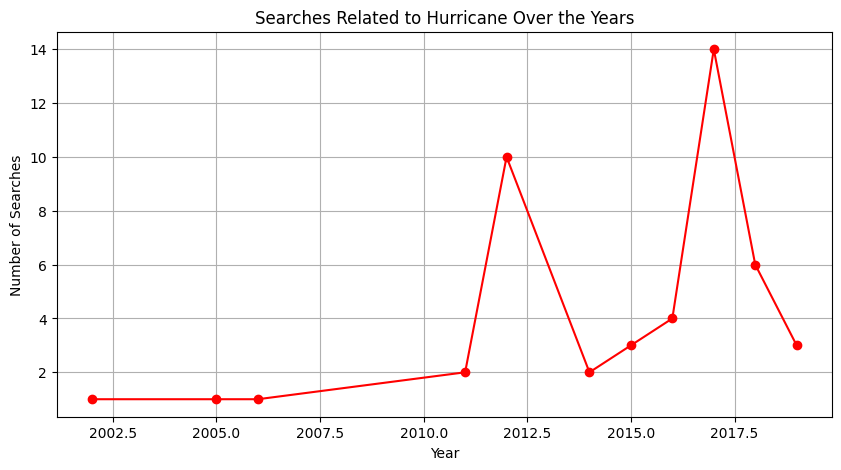

In [ ]:
event_query = df[df['query'].str.contains('Hurricane')]
event_trend = event_query.groupby('year')['query'].count()

plt.figure(figsize=(10, 5))
event_trend.plot(kind='line', marker='o', color='red')
plt.title('Searches Related to Hurricane Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.grid()
plt.show()

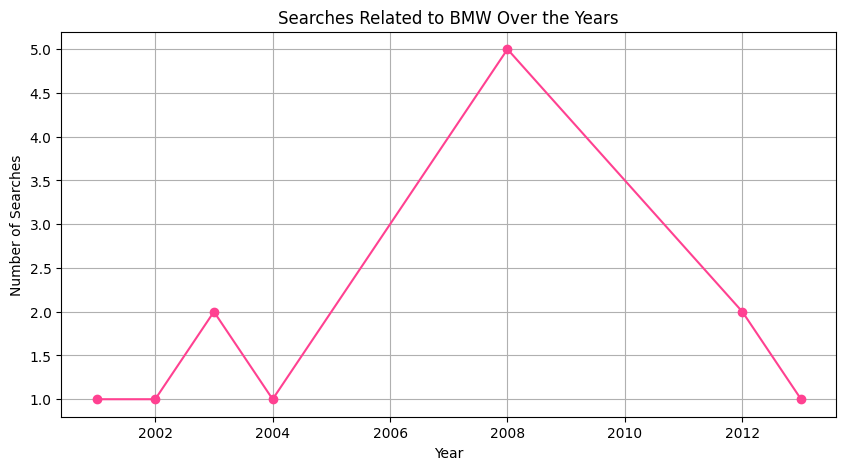

In [ ]:
event_query = df[df['query'].str.contains('BMW')]
event_trend = event_query.groupby('year')['query'].count()

plt.figure(figsize=(10, 5))
event_trend.plot(kind='line', marker='o', color='#FF4191')
plt.title('Searches Related to BMW Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.grid()
plt.show()

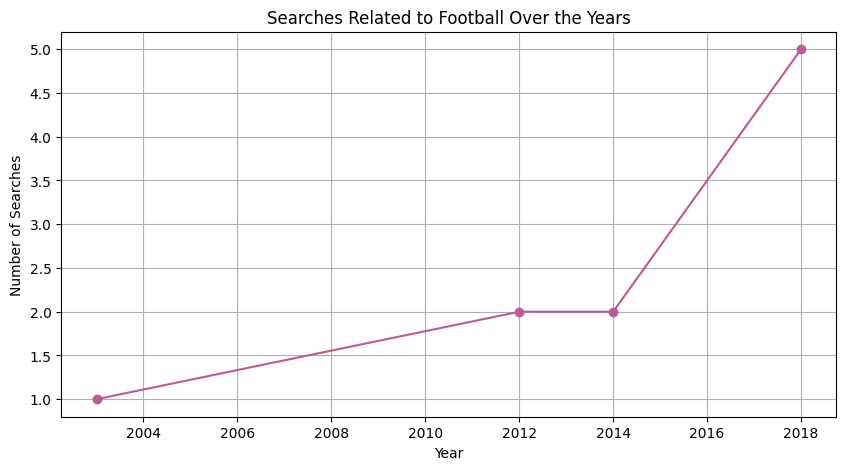

In [ ]:
event_query = df[df['query'].str.contains('Football')]
event_trend = event_query.groupby('year')['query'].count()

plt.figure(figsize=(10, 5))
event_trend.plot(kind='line', marker='o', color='#BC5A94')
plt.title('Searches Related to Football Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.grid()
plt.show()

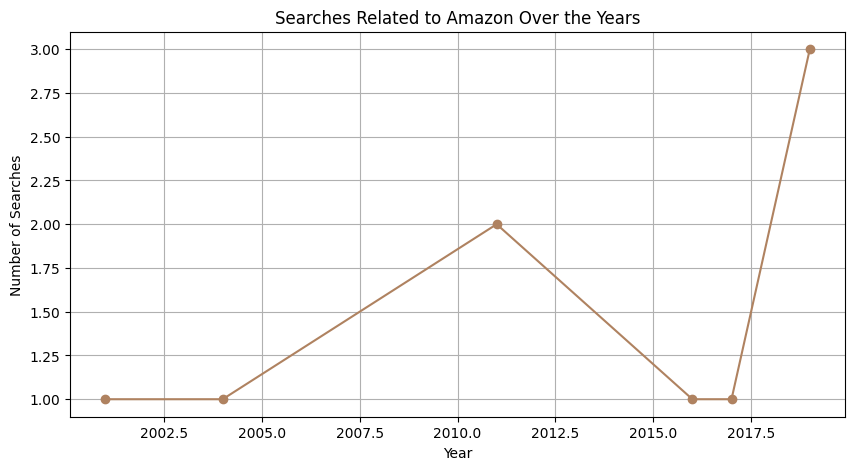

In [ ]:
event_query = df[df['query'].str.contains('Amazon')]
event_trend = event_query.groupby('year')['query'].count()

plt.figure(figsize=(10, 5))
event_trend.plot(kind='line', marker='o', color='#AF8260')
plt.title('Searches Related to Amazon Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Searches')
plt.grid()
plt.show()

In [ ]:
location_counts = df['location'].value_counts().head(10)
location_counts

,count
location,
United States,2070
Global,1135
Canada,690
Brazil,675
France,630
United Kingdom,590
Japan,586
Finland,555
Mexico,550


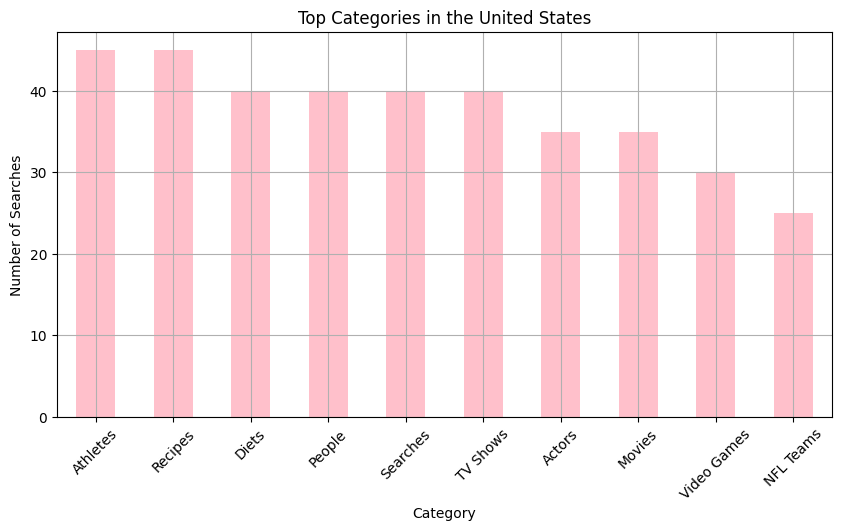

In [ ]:
country_specific_trends = df[df['location'] == 'United States'].groupby('category')['query'].count().nlargest(10)

plt.figure(figsize=(10, 5))
country_specific_trends.plot(kind='bar' , color="pink")
plt.title('Top Categories in the United States')
plt.xlabel('Category')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
year = 2016
location = 'United States'
top_10_queries = df[(df['year'] == year) & (df['location'] == location)]['query'].value_counts().head(10)
print("Top 10 search queries in", year, "and", location + ":")
print(top_10_queries)

Top 10 search queries in 2016 and United States:
query
Donald Trump         3
Michael Phelps       3
Chicago Cubs         2
Coors                2
Usain Bolt           2
Cam Newton           2
Simone Biles         2
Ryan Lochte          2
Brie Larson          2
Cleveland Indians    2
Name: count, dtype: int64


In [ ]:
year = 2016
location = 'United States'
top_10_category = df[(df['year'] == year) & (df['location'] == location)]['category'].value_counts().head(10)
print("Top 10 search category in", year, "and", location + ":")
print(top_10_category)

Top 10 search category in 2016 and United States:
category
Searches            5
Recipes             5
NBA Teams           5
NFL Players         5
NFL Teams           5
NHL Players         5
NHL Teams           5
Olympic Athletes    5
Olympic Events      5
Olympic Moments     5
Name: count, dtype: int64


In [ ]:
year = 2020
location = 'United States'
top_10_queries = df[(df['year'] == year) & (df['location'] == location)]['query'].value_counts().head(10)
print("Top 10 search queries in", year, "and", location + ":")
print(top_10_queries)

Top 10 search queries in 2020 and United States:
query
Election results              2
Joe Biden                     2
How to style curtain bangs    2
WAP                           2
Kamala Harris                 2
Ryan Newman                   2
Coronavirus                   2
Kobe Bryant                   2
Where to buy Xbox Series X    1
Where is my refunds           1
Name: count, dtype: int64


In [ ]:
year = 2020
location = 'United States'
top_10_queries = df[(df['year'] == year) & (df['location'] == location)]['category'].value_counts().head(10)
print("Top 10 search category in", year, "and", location + ":")
print(top_10_queries)

Top 10 search category in 2020 and United States:
category
Searches                  5
Near me                   5
Quién...                  5
Qué es...                 5
Películas                 5
Dónde...                  5
Cómo...                   5
... during coronavirus    5
Why...                    5
Where to buy...           5
Name: count, dtype: int64


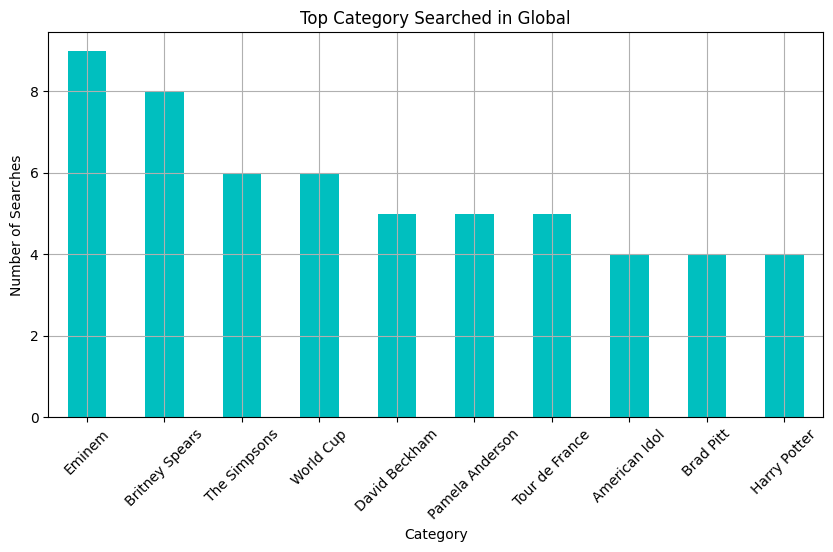

In [ ]:
canada_personalities = df[df['location'] == 'Global'].groupby('query').size().nlargest(10)

# رسم البيانات
plt.figure(figsize=(10, 5))
canada_personalities.plot(kind='bar', color='c')
plt.title('Top Category Searched in Global')
plt.xlabel('Category')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.grid()
plt.show()


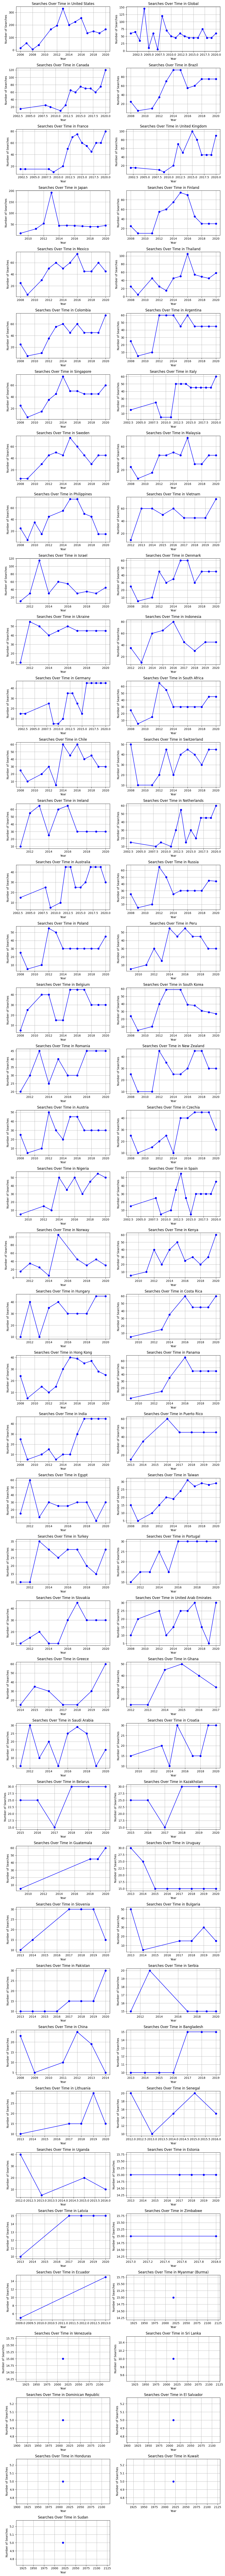

In [ ]:
location_counts = df['location'].value_counts()
n_locations = len(location_counts)
nrows = (n_locations // 2) + (n_locations % 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(11, 3 * nrows))
axes = axes.flatten()

for i, location in enumerate(location_counts.index):
    location_searches = df[df['location'] == location]
    searches_count = location_searches.groupby('year')['query'].count()


    if not searches_count.empty:
        axes[i].plot(searches_count.index, searches_count, marker='o', color='blue')
        axes[i].set_title(f'Searches Over Time in {location}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Number of Searches')
        axes[i].grid()


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

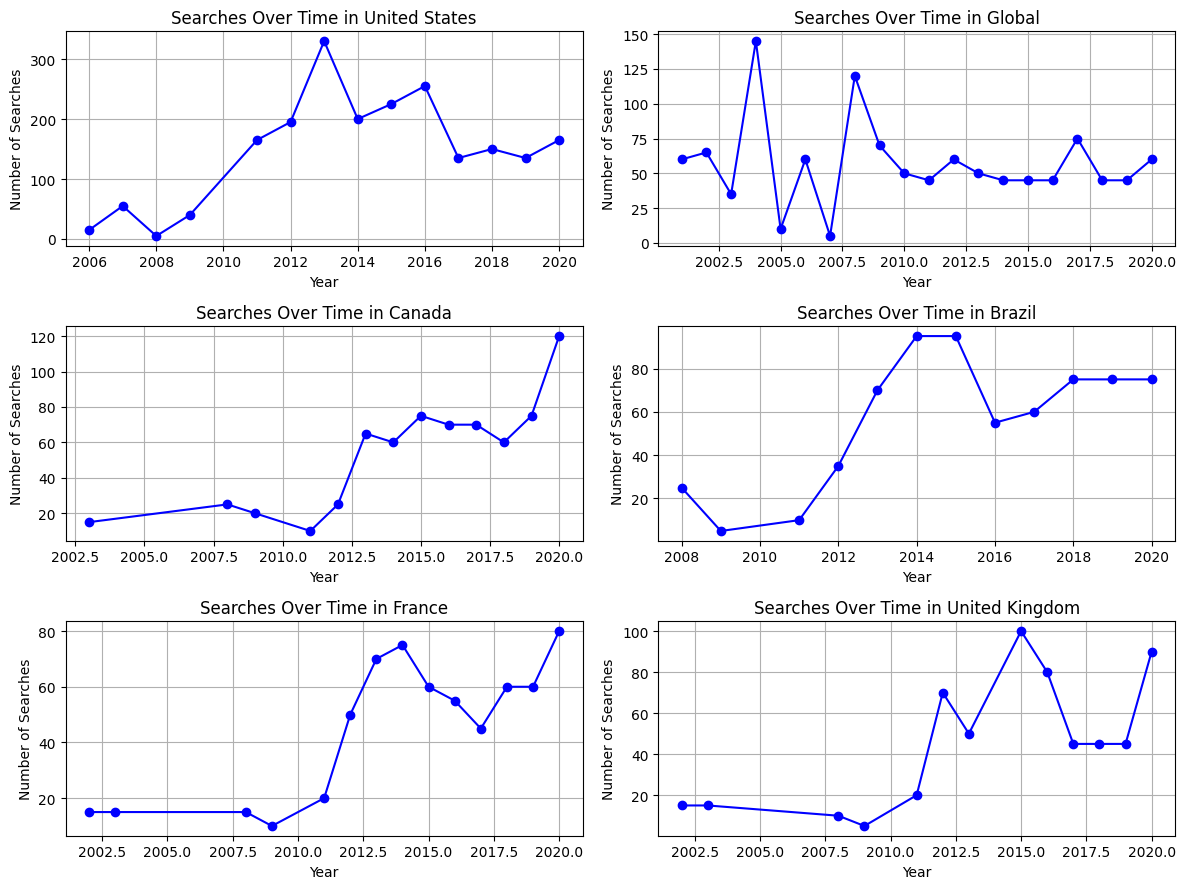

In [ ]:
location_counts = df['location'].value_counts(ascending=False).head(6)

n_locations = len(location_counts)
nrows = (n_locations // 2) + (n_locations % 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 3 * nrows))
axes = axes.flatten()


for i, location in enumerate(location_counts.index):
    location_searches = df[df['location'] == location]
    searches_count = location_searches.groupby('year')['query'].count()


    if not searches_count.empty:
        axes[i].plot(searches_count.index, searches_count, marker='o', color='blue')
        axes[i].set_title(f'Searches Over Time in {location}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Number of Searches')
        axes[i].grid()


# إزالة المحاور الفارغة إذا كانت موجودة
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# تنسيق المسافات بين subplots
plt.tight_layout()
plt.show()

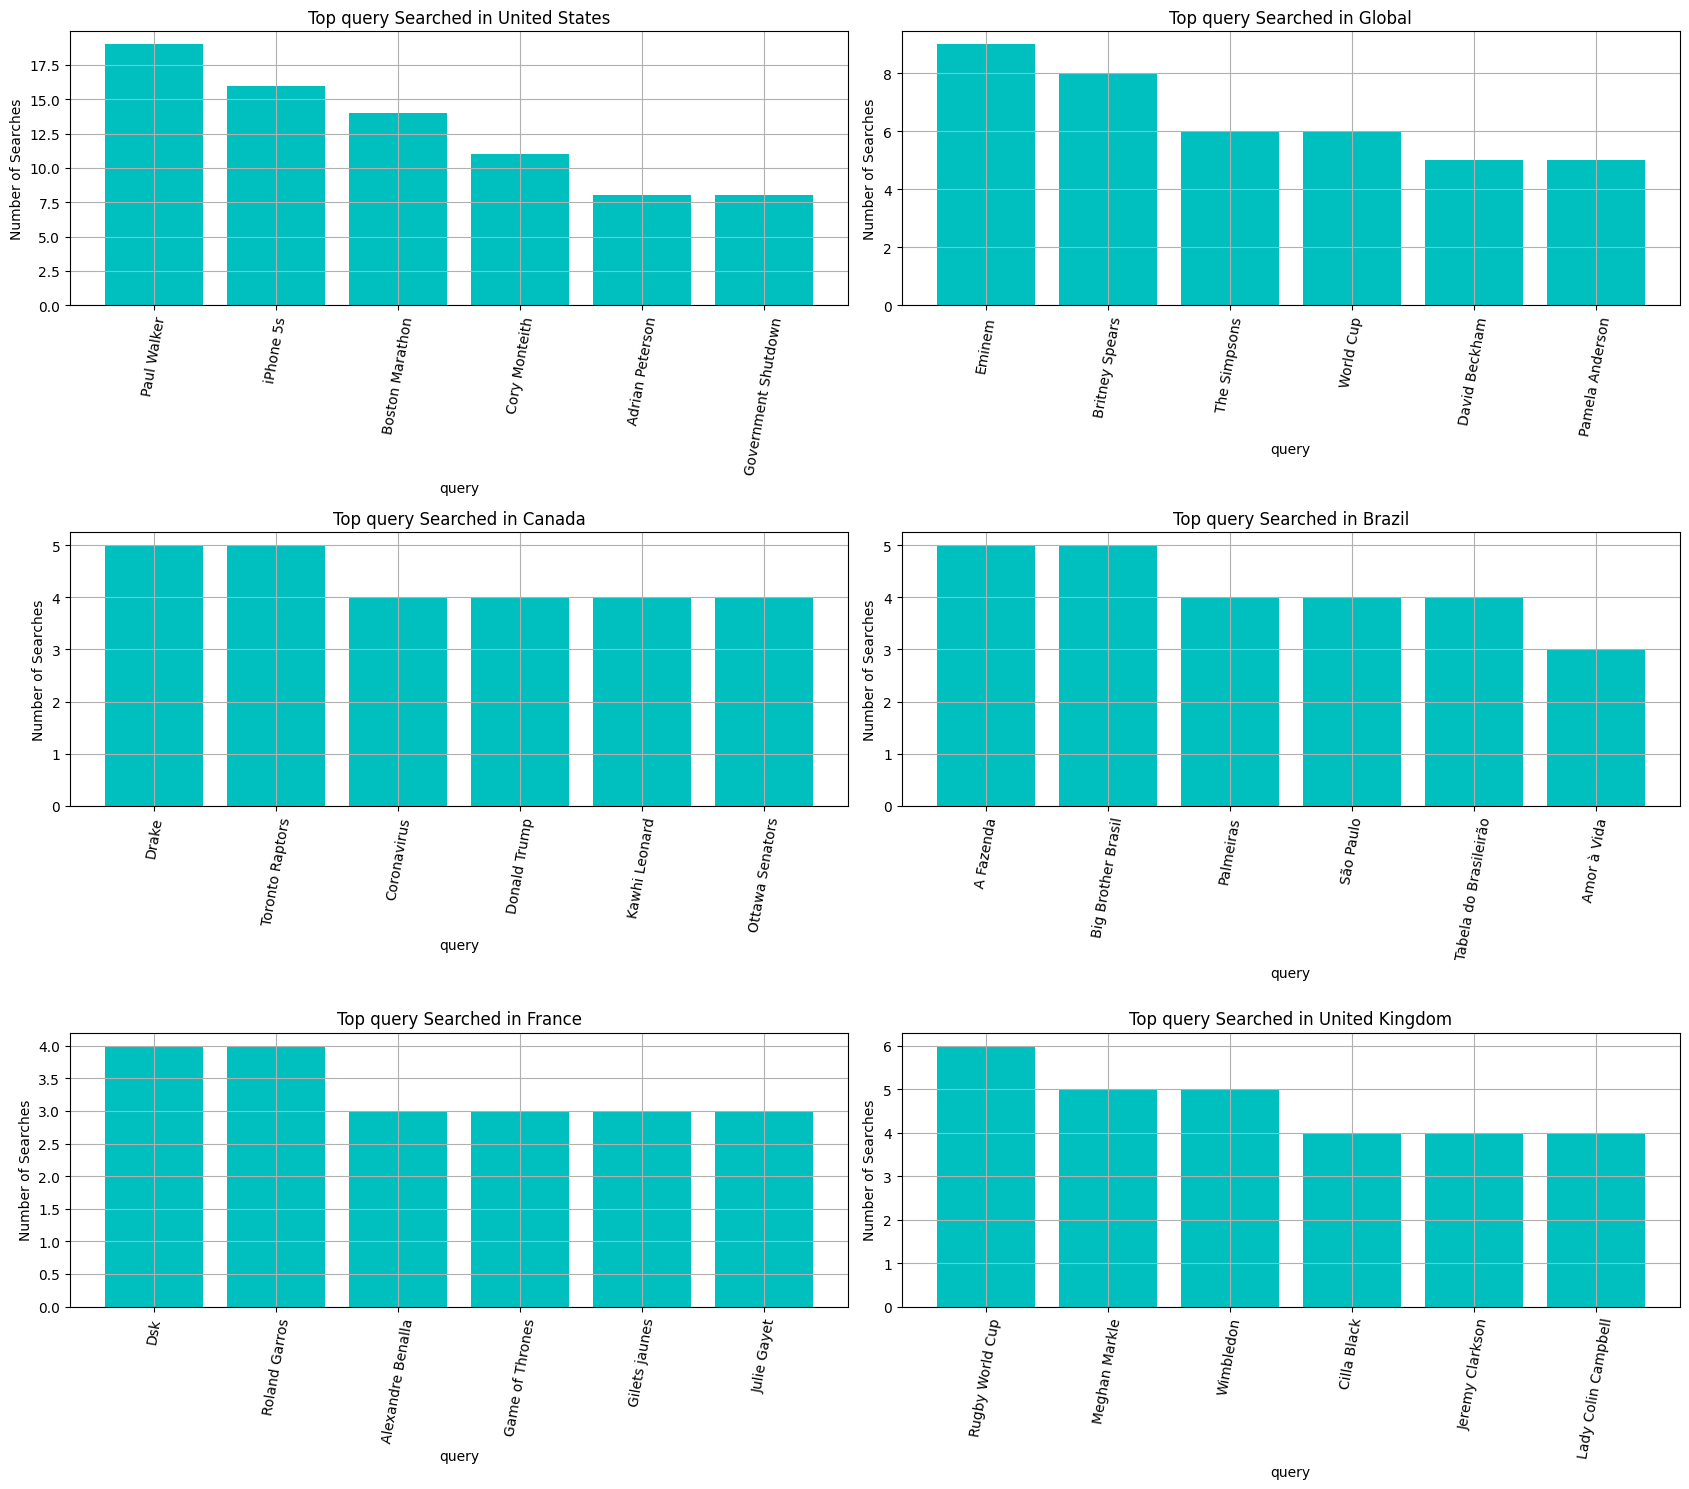

In [ ]:
location_counts = df['location'].value_counts(ascending=False).head(6)

n_locations = len(location_counts)
nrows = (n_locations // 2) + (n_locations % 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(17, 5 * nrows))
axes = axes.flatten()

for i, location in enumerate(location_counts.index):
    personalities = df[df['location'] == location].groupby('query').size().nlargest(6)


    axes[i].bar(personalities.index, personalities, color='c')
    axes[i].set_title(f'Top query Searched in {location}')
    axes[i].set_xlabel('query')
    axes[i].set_ylabel('Number of Searches')
    axes[i].tick_params(axis='x', rotation=80)
    axes[i].grid()


plt.tight_layout()
plt.show()

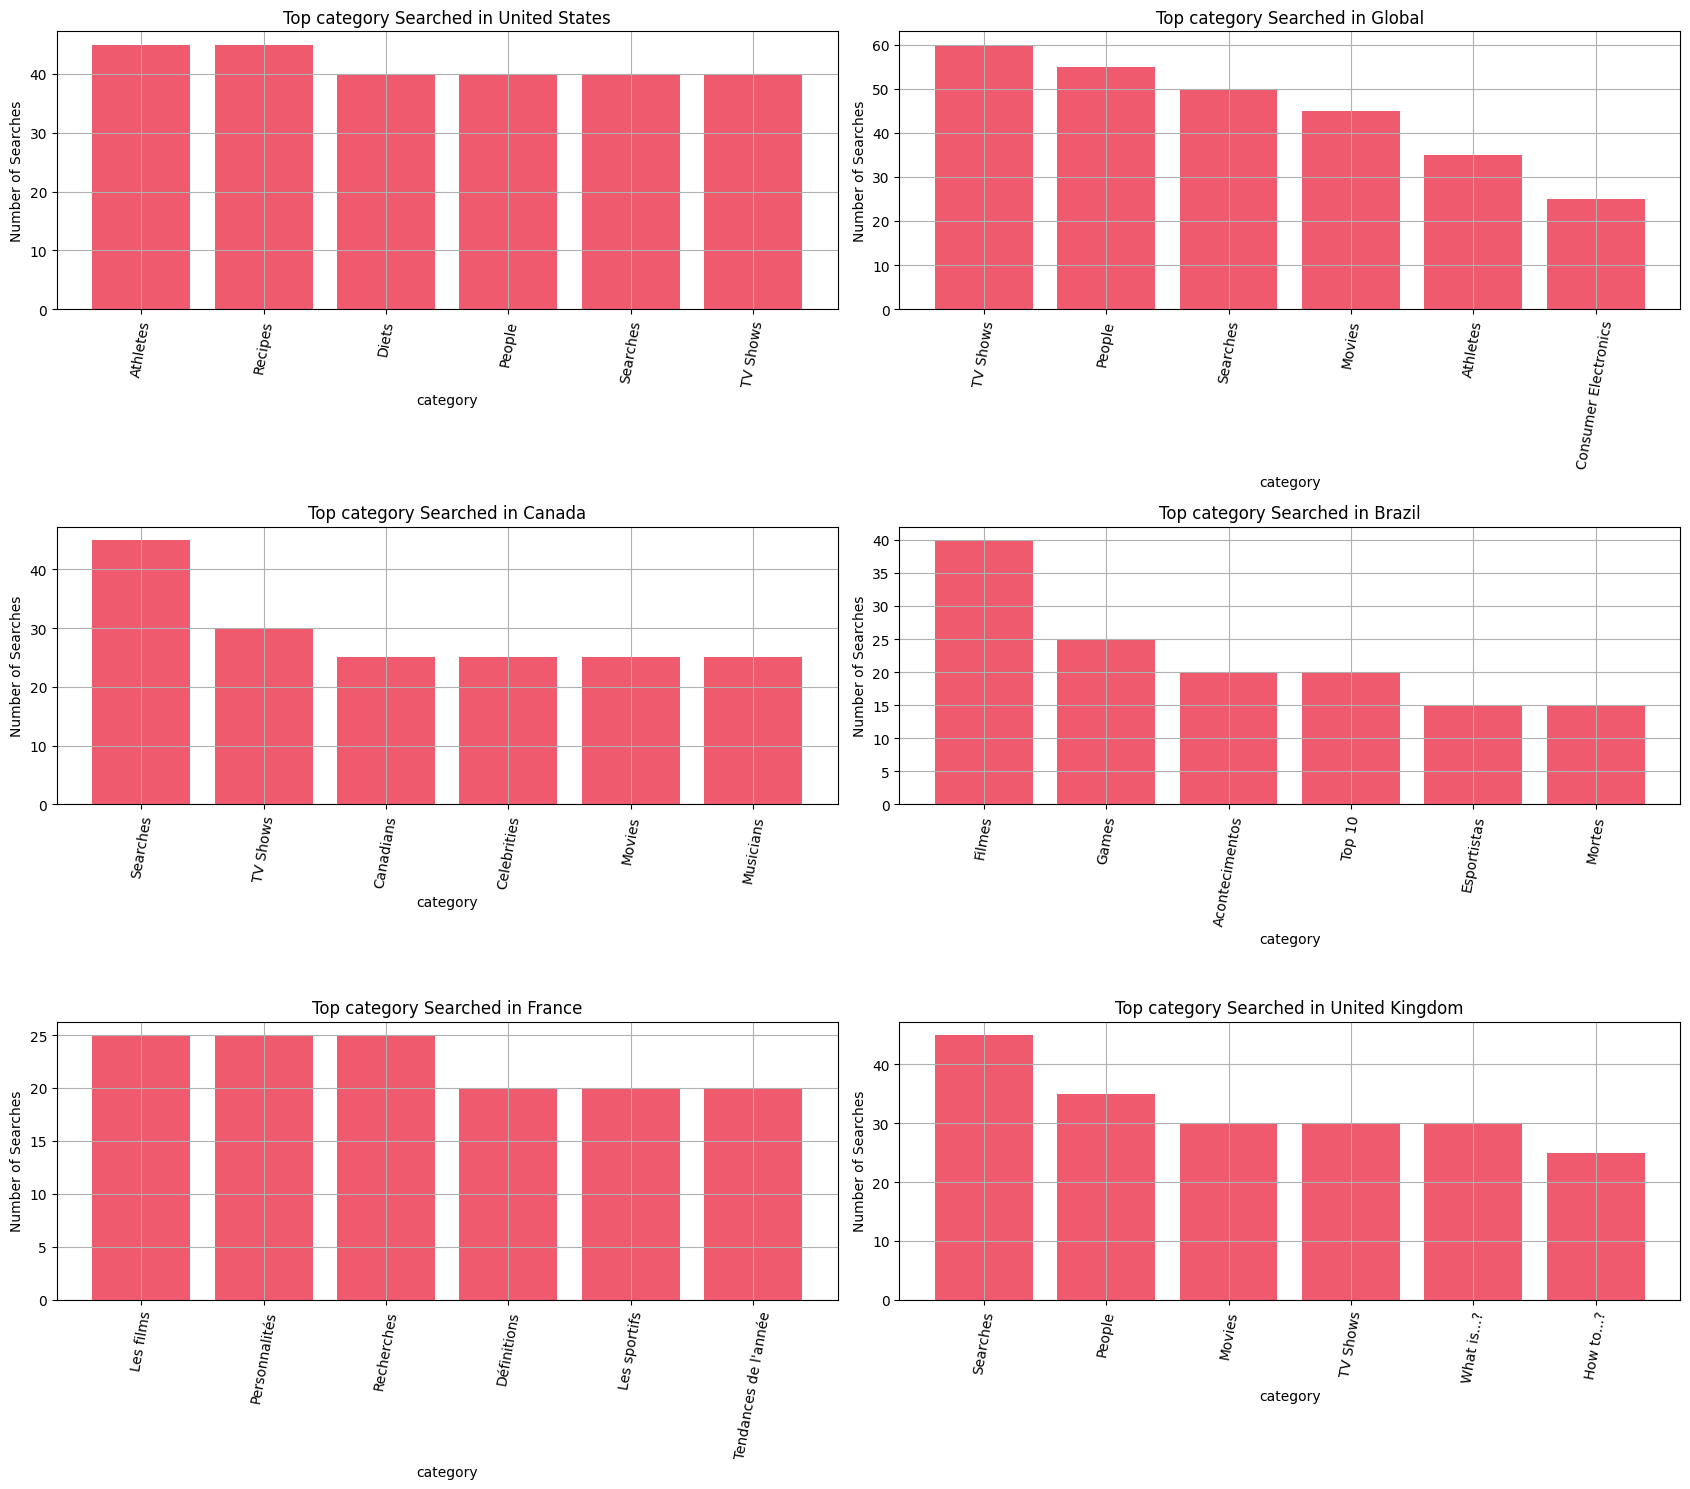

In [ ]:
location_counts = df['location'].value_counts(ascending=False).head(6)

n_locations = len(location_counts)
nrows = (n_locations // 2) + (n_locations % 2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(17, 5 * nrows))
axes = axes.flatten()


for i, location in enumerate(location_counts.index):
    personalities = df[df['location'] == location].groupby('category').size().nlargest(6)


    axes[i].bar(personalities.index, personalities, color='#EF5A6F')
    axes[i].set_title(f'Top category Searched in {location}')
    axes[i].set_xlabel('category')
    axes[i].set_ylabel('Number of Searches')
    axes[i].tick_params(axis='x', rotation=80)
    axes[i].grid()


plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['rank', 'year']).size().unstack()

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
rank,,,,,,,,,,,,,,,,,,,,
1,12,22,31,29,2,15,12,178,89,18,178,444,539,464,553,604,513,504,519,594
2,12,22,31,29,2,15,12,178,89,18,178,445,548,463,553,603,519,508,519,592
3,12,22,31,29,2,15,12,178,89,18,178,445,545,464,555,603,517,509,521,592
4,12,22,31,29,2,15,12,178,89,18,178,445,547,464,553,605,518,507,518,593
5,12,22,31,29,2,15,12,179,89,18,178,445,551,463,554,603,518,508,518,592


In [ ]:
df.groupby('year')['rank'].sum()

,rank
year,
2001,180
2002,330
2003,465
2004,435
2005,30
2006,225
2007,180
2008,2675
2009,1335


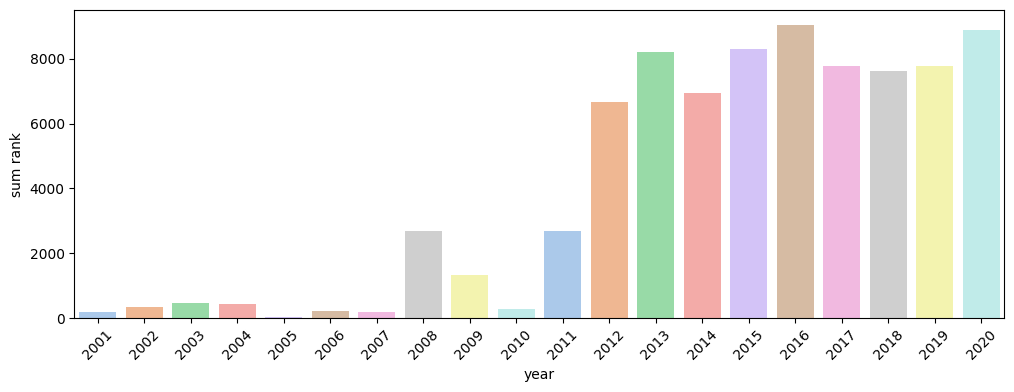

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x='year', y='rank', data=df, estimator='sum', palette='pastel' ,ci=None )
plt.xlabel('year')
plt.ylabel('sum rank')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.corr(numeric_only=True)

,year,rank
year,1.000000,-0.000464
rank,-0.000464,1.000000


In [ ]:
high_rank = df[df['rank'] ==5 ]['query'].value_counts()
pd.DataFrame(high_rank)

,count
query,
???,67
????,50
??,35
?????,34
??????,31
...,...
Ukraina,1
NOS,1
emagrecer rapidamente,1


In [ ]:
low_rank = df[df['rank'] ==5 ]['category'].value_counts()
pd.DataFrame(low_rank)

,count
category,
People,152
Searches,124
???????,72
??????,67
Movies,66
...,...
På TV,1
På nett,1
Politiske partier,1


In [ ]:
low_rank = df[df['rank'] ==1 ]['query'].value_counts()
pd.DataFrame(low_rank)

,count
query,
???,69
????,53
Paul Walker,52
?????,43
Coronavirus,42
...,...
Qué es aneurisma,1
Vhong Navarro,1
Pacquiao vs Algieri,1


In [ ]:
low_rank = df[df['rank'] ==1 ]['category'].value_counts()
pd.DataFrame(low_rank)

,count
category,
People,152
Searches,124
???????,71
Movies,66
??????,64
...,...
På TV,1
På nett,1
Politiske partier,1


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your data is in 'trends.csv'
df = pd.read_csv('/content/trends.csv', encoding='latin1')  # Load your DataFrame here

# Filter data for Consumer Brands category
brands_df = df[df['category'] == 'Consumer Brands']

# Select features and target variable
X = brands_df[['year']]  # Using year as the feature
y = brands_df['rank']   # Using rank as the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict for a specific year (e.g., 2023)
future_year = [[2023]]  # Input year in a 2D array
predicted_rank = model.predict(future_year)
print(f"Predicted Rank for 2023: {predicted_rank[0]}")

Mean Squared Error: 3.218994140625
Predicted Rank for 2023: 1.390625


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
